<a href="https://colab.research.google.com/github/PavicicJadranko/Machine-Learning-Project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting survival on the Titanic shipwreck using machine learning

This notebook looks into using varius Pythone_based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has survived on the Titanic based on the given passengers information.

We are going to take the following approach:
1. Problem definitio
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition
In a statement
> Given information about a passenger, can we predict whether or not they would survive the Titanic shipwreck?

## 2. Data

The data is availabel on Kaggle:
https://www.kaggle.com/competitions/titanic/data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a passenger would survive the Titanic shipwreck, we'll pursue the project.

## 4. Features

Below you will get different informations about each of the features in your data.

1. survival: Survival
* 0 = No
* 1 = Yes
2. pclass:	Ticket class
* 1 = 1st
* 2 = 2nd
* 3 = 3rd
3. sex:	Sex
4. Age:	Age in years
5. sibsp:	of siblings / spouses aboard the Titanic
6. parch:	of parents / children aboard the Titanic
7. ticket:	Ticket number
8. fare:	Passenger fare
9. cabin:	Cabin number
10. embarked:	Port of Embarkation
* C = Cherbourg
* Q = Queenstown
* S = Sout






## Prepering the tools
We're going to use pandas, numpy, seaborn and matplotlib for data analysis and visualization.

In [1]:
# Regular EDA and ploting libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For showing the plot in jupyter notebook
%matplotlib inline


## Load Data

In [2]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv")
df.shape

(891, 12)

## Data Exploration (EDA)

The goal here is to find out more about data and become a subject matter export on the dataset you're working with

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.head(7) # First 7 passengers in the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
df.tail(7) # Last 7 passengesr in the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [5]:
# Finding how much classes there is
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


We can se that we are dealing with binary classification. In binary classification, the model predicts one of two possible outcomes for each instance in the dataset.

## Data visualization for the classes (0, 1)

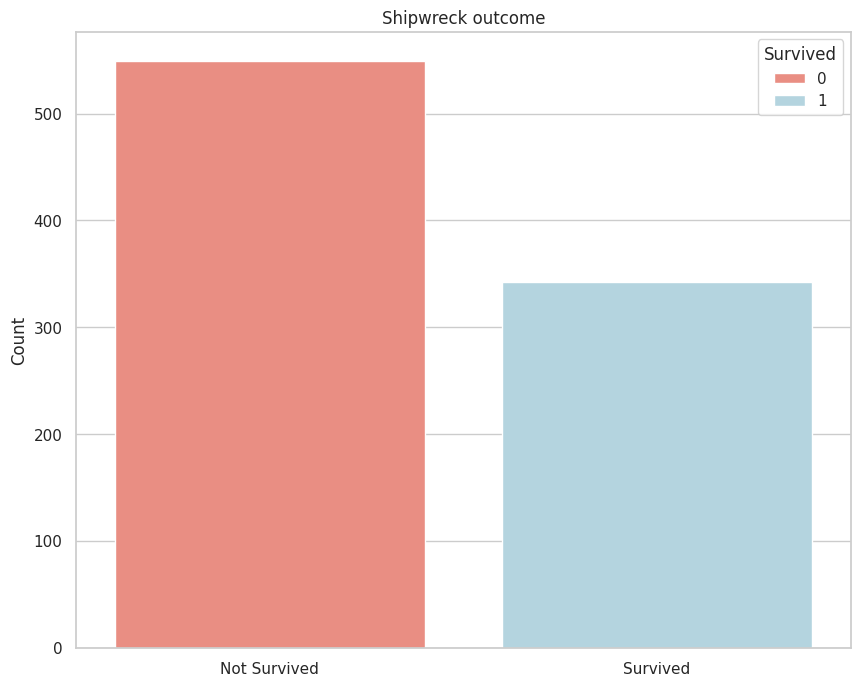

In [6]:
# Ploting the Survived column with a bar plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))  # Set the figure size
sns.countplot(x="Survived", hue="Survived", data=df, palette=["lightblue", "salmon"][::-1], legend= "auto")

plt.xlabel("")
plt.ylabel("Count")
plt.title("Shipwreck outcome")
plt.xticks(ticks=[0, 1], labels=["Not Survived", "Survived"])


# Show the plot
plt.show()

In [7]:
# Checking for missing value
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Shipwreck survival according to Sex

In [9]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [27]:
# Compare Survived column with Sex column
survived_sex_plot = pd.crosstab(df["Survived"], df["Sex"])
survived_sex_plot

Sex,female,male
Survived,,
0,81,468
1,233,109


In [28]:
# Create a plot of crosstab

survived_sex_plot = survived_sex_plot.reset_index()

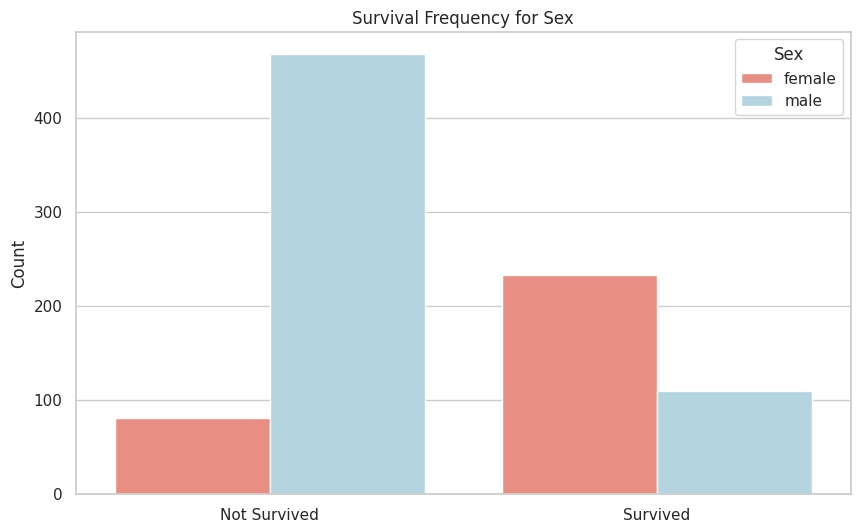

In [32]:


# Melt the DataFrame for easier plotting with Seaborn
survived_sex_plot_melted = survived_sex_plot.melt(id_vars='Survived',
                                                value_vars=['female', 'male'],
                                                var_name='Sex',
                                                value_name='Count')

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Survived', y='Count', hue='Sex', data=survived_sex_plot_melted, palette=["salmon", "lightblue"])

plt.xlabel("")
plt.title("Survival Frequency for Sex")
plt.xticks(ticks=[0, 1], labels=["Not Survived", "Survived"])
plt.show()

## Shipwreck survival acording to ticket class

In [31]:
# Compare Survival column with ticket class column
ticket_class_suvival = pd.crosstab(df["Survived"], df["Pclass"])
ticket_class_suvival

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [36]:
ticket_class_suvival = ticket_class_suvival.reset_index()

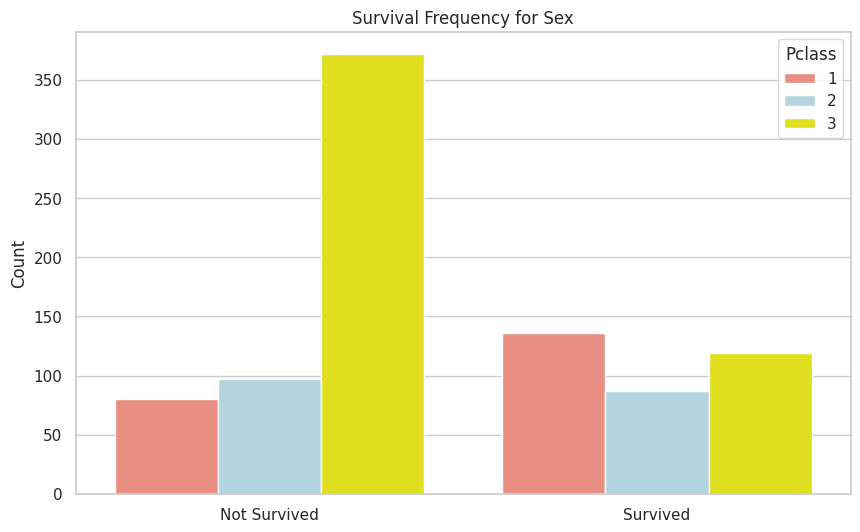

In [40]:
# Plot the data

ticket_class_suvival_melted = ticket_class_suvival.melt(id_vars='Survived', value_vars=[1, 2, 3], var_name='Pclass', value_name='Count')

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Survived', y='Count', hue='Pclass', data=ticket_class_suvival_melted, palette=["salmon", "lightblue", "yellow"])

plt.xlabel("")
plt.title("Survival Frequency for Sex")
plt.xticks(ticks=[0, 1], labels=["Not Survived", "Survived"])
plt.show()